In [1]:
import requests
import json

user = {'email':'korisnik@email.com', 
        'password':'korisnik'}
tokens_url = "http://localhost/tokens"

r = requests.post(url = tokens_url, json = user)
token = json.loads(r.text)["token"]

thing = json.loads(requests.get("http://localhost/things?name=show",
            headers={"Authorization":token}).text)["things"][0]
channel = json.loads(requests.get("http://localhost/things/"+thing["id"]+"/channels",
            headers={"Authorization":token}).text)['channels'][0]

In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

def plot_graph(fig, ax, data, i, colors=['b']):
    if ax.lines: #modify the plot
        for line in ax.lines:
            plt.figure(fig.number)
            line.set_ydata(data['value'][i:i+15])
            plt.xticks(range(15), data['time'][i:i+15])
            plt.gcf().autofmt_xdate()
            
    else: #set plot data for the first time
        plt.figure(fig.number)
        plt.plot(data['value'][i:i+15])
        plt.xticks(range(15), data['time'][i:i+15])
        plt.gcf().autofmt_xdate()
        plt.title('value vs time')

    fig.canvas.draw()
    

In [3]:
import paho.mqtt.client as mqtt


temperature_data = {}
temperature_data['value']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
temperature_data['time'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
t_count = [0]

humidity_data = {}
humidity_data['value']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
humidity_data['time'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
h_count = [0]

presure_data = {}
presure_data['value']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
presure_data['time'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
p_count = [0]

wind_data = {}
wind_data['value']=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]
wind_data['time'] = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
w_count = [0]

def on_connect(client, userdata, flags, rc):
    print("Connected with result code "+str(rc))
    client.subscribe("channels/"+channel['id']+"/messages/#")#/temperature

def on_message(client, userdata, msg):
    print(msg.topic+" "+str(msg.payload))
    
def on_temperature(client, userdata, msg):
    message = json.loads(msg.payload)
    temperature_data['value'].append(message[0]['value'])
    temperature_data['time'].append(message[0]['time'])
    plot_graph(temp_fig, temp_ax, temperature_data, t_count[0])
    t_count[0]=t_count[0]+1
    
def on_humidity(client, userdata, msg):
    message = json.loads(msg.payload)
    humidity_data['value'].append(message[0]['value'])
    humidity_data['time'].append(message[0]['time'])
    plot_graph(hmd_fig, hmd_ax, humidity_data, h_count[0])
    h_count[0]=h_count[0]+1
    
def on_presure(client, userdata, msg):
    message = json.loads(msg.payload)
    presure_data['value'].append(message[0]['value'])
    presure_data['time'].append(message[0]['time'])
    plot_graph(prs_fig, prs_ax, presure_data, p_count[0])
    p_count[0]=p_count[0]+1
    
def on_wind(client, userdata, msg):
    message = json.loads(msg.payload)
    wind_data['value'].append(message[0]['value'])
    wind_data['time'].append(message[0]['time'])
    plot_graph(wind_fig, wind_ax, wind_data, w_count[0])
    w_count[0]=w_count[0]+1

<IPython.core.display.Javascript object>


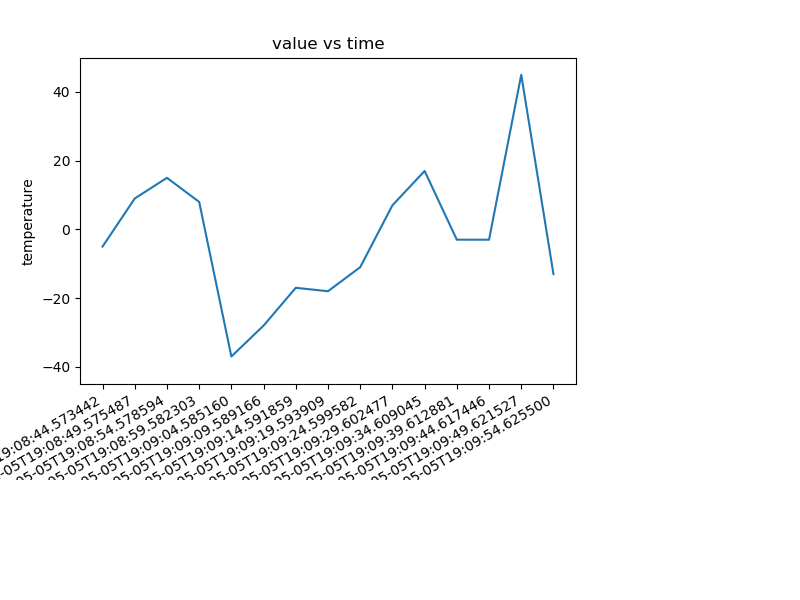

<IPython.core.display.Javascript object>


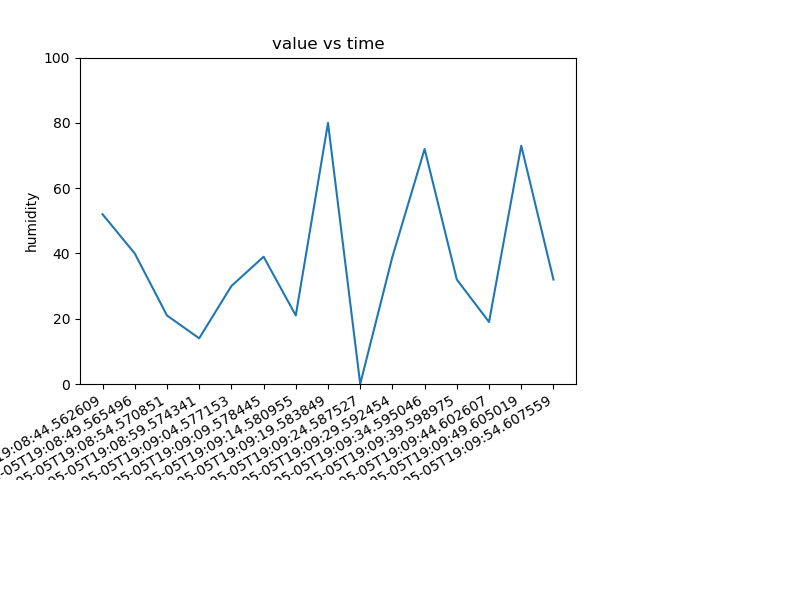

<IPython.core.display.Javascript object>


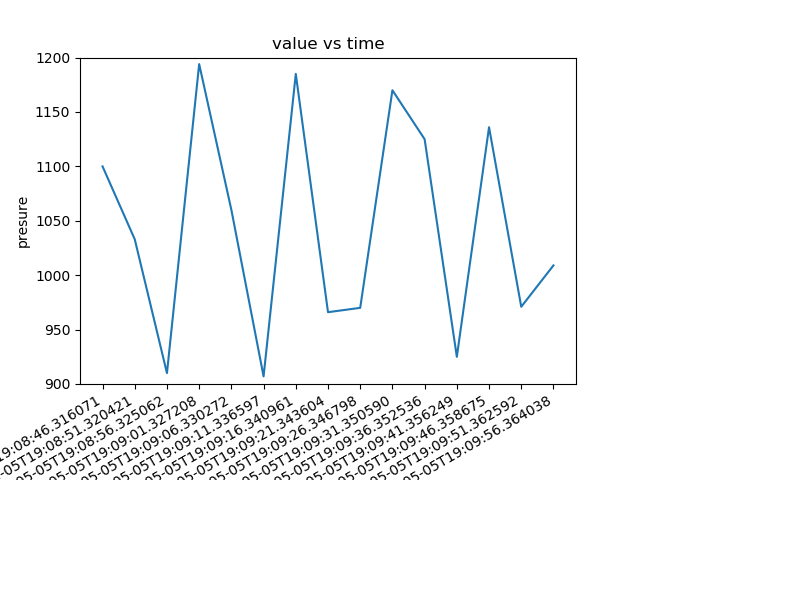

<IPython.core.display.Javascript object>


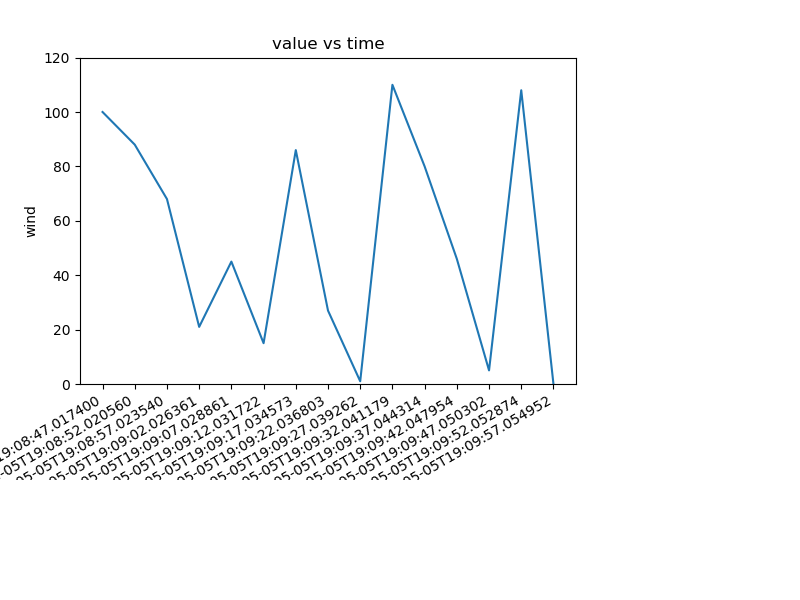

Connected with result code 0


KeyboardInterrupt: 

In [4]:
temp_fig,temp_ax = plt.subplots(1,1)
temp_ax.set_xlabel('time')
temp_ax.set_ylabel('temperature')
temp_ax.set_ylim(-45,50)

hmd_fig,hmd_ax = plt.subplots(1,1)
hmd_ax.set_xlabel('time')
hmd_ax.set_ylabel('humidity')
hmd_ax.set_ylim(0,100)

prs_fig,prs_ax = plt.subplots(1,1)
prs_ax.set_xlabel('time')
prs_ax.set_ylabel('presure')
prs_ax.set_ylim(900,1200)

wind_fig,wind_ax = plt.subplots(1,1)
wind_ax.set_xlabel('time')
wind_ax.set_ylabel('wind')
wind_ax.set_ylim(0,120)

client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message

client.message_callback_add("channels/"+channel['id']+"/messages/temperature",
                           on_temperature)
client.message_callback_add("channels/"+channel['id']+"/messages/humidity",
                           on_humidity)
client.message_callback_add("channels/"+channel['id']+"/messages/presure",
                           on_presure)
client.message_callback_add("channels/"+channel['id']+"/messages/wind",
                           on_wind)


client.username_pw_set(thing['id'], thing['key'])
client.connect("localhost")

client.loop_forever()